In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import models

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# dataset

In [56]:
df =pd.read_excel('Documents//datasets//salary_data.xlsx')

In [57]:
df.head()

,Name,Age,Income($)
0,Rob,30,70000
1,Michael,27,90000
2,Mohan,28,61000
3,Ismail,29,60000
4,Kory,41,150000


# visualization

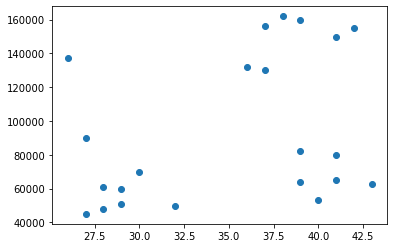

In [58]:
plt.scatter(df['Age'] ,df['Income($)'])

In [59]:
kn = KMeans(n_clusters=3)

In [60]:
kn

KMeans(n_clusters=3)

# fitting prediction

In [61]:
y_pred = kn.fit_predict(df[['Age' ,'Income($)']])

# adding column

In [65]:
df['cluster']= y_pred

In [66]:
df.head()

,Name,Age,Income($),cluster
0,Rob,30,70000,2
1,Michael,27,90000,2
2,Mohan,28,61000,1
3,Ismail,29,60000,1
4,Kory,41,150000,0


# visualizing clusters created

In [67]:
df0 =df[df.cluster ==0]
df1 =df[df.cluster ==1]
df2 =df[df.cluster ==2]

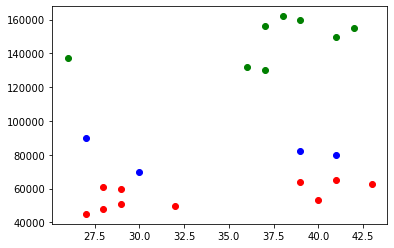

In [68]:
plt.scatter(df0.Age ,df0['Income($)'] ,color='green')
plt.scatter(df1.Age ,df1['Income($)'], color ='red')
plt.scatter(df2['Age'],df2['Income($)'] ,color ='blue')

No handles with labels found to put in legend.


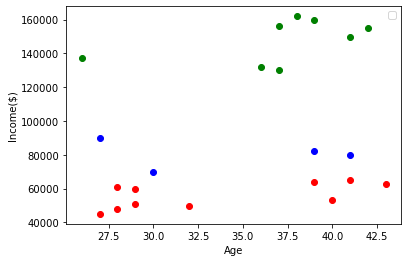

In [69]:
plt.scatter(df0.Age ,df0['Income($)'] ,color='green')
plt.scatter(df1.Age ,df1['Income($)'], color ='red')
plt.scatter(df2['Age'],df2['Income($)'] ,color ='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# scaling income

In [72]:
scaler = MinMaxScaler()

In [73]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [74]:
df['income_cluster']=scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster,income_cluster
0,Rob,30,70000,2,0.213675
1,Michael,27,90000,2,0.384615
2,Mohan,28,61000,1,0.136752
3,Ismail,29,60000,1,0.128205
4,Kory,41,150000,0,0.897436


In [75]:
scaler.fit(df[['Age']])
df['Age_cluster'] =scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster,income_cluster,Age_cluster
0,Rob,30,70000,2,0.213675,0.235294
1,Michael,27,90000,2,0.384615,0.058824
2,Mohan,28,61000,1,0.136752,0.117647
3,Ismail,29,60000,1,0.128205,0.176471
4,Kory,41,150000,0,0.897436,0.882353


In [76]:
kn = KMeans(n_clusters=3)

In [77]:
y_predicted = kn.fit_predict(df[['Age' ,'Income($)']])

In [78]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
      dtype=int32)

In [80]:
df['_3_clusters']=y_predicted

In [81]:
df.drop('cluster' ,axis='columns')

,Name,Age,Income($),income_cluster,Age_cluster,_3_clusters
0,Rob,30,70000,0.213675,0.235294,2
1,Michael,27,90000,0.384615,0.058824,2
2,Mohan,28,61000,0.136752,0.117647,0
3,Ismail,29,60000,0.128205,0.176471,0
4,Kory,41,150000,0.897436,0.882353,1
5,Gautam,42,155000,0.940171,0.941176,1
6,David,39,160000,0.982906,0.764706,1
7,Andrea,38,162000,1.000000,0.705882,1
8,Brad,37,156000,0.948718,0.647059,1
9,Angelina,36,132000,0.743590,0.588235,1


In [83]:
df.drop(['Name' ,'Age','Income($)'] ,axis='columns')

,cluster,income_cluster,Age_cluster,_3_clusters
0,2,0.213675,0.235294,2
1,2,0.384615,0.058824,2
2,1,0.136752,0.117647,0
3,1,0.128205,0.176471,0
4,0,0.897436,0.882353,1
5,0,0.940171,0.941176,1
6,0,0.982906,0.764706,1
7,0,1.000000,0.705882,1
8,0,0.948718,0.647059,1
9,0,0.743590,0.588235,1


# getting the centroid 

In [84]:
kn.cluster_centers_

array([[3.3600e+01, 5.5950e+04],
       [3.7000e+01, 1.4775e+05],
       [3.4250e+01, 8.0500e+04]])

No handles with labels found to put in legend.


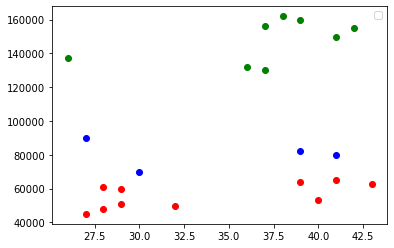

In [85]:
df0 =df[df.cluster ==0]
df1 =df[df.cluster ==1]
df2 =df[df.cluster ==2]
plt.scatter(df0.Age ,df0['Income($)'] ,color='green')
plt.scatter(df1.Age ,df1['Income($)'], color ='red')
plt.scatter(df2['Age'],df2['Income($)'] ,color ='blue')
plt.legend()

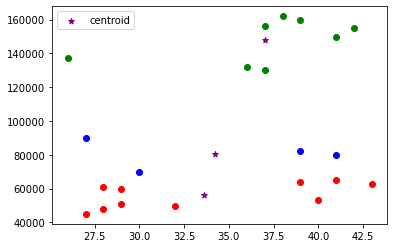

In [90]:
df0 =df[df.cluster ==0]
df1 =df[df.cluster ==1]
df2 =df[df.cluster ==2]
plt.scatter(df0.Age ,df0['Income($)'] ,color='green')
plt.scatter(df1.Age ,df1['Income($)'], color ='red')
plt.scatter(df2['Age'],df2['Income($)'] ,color ='blue')
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1] ,color='purple' ,marker='*' ,label='centroid')
plt.legend()

# using elbow plot method

In [92]:
k_range =range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

# sum square error

In [93]:
sse

[40175330270.409096,
 3578732815.214286,
 1856725671.1500003,
 812425594.35,
 268833875.99999994,
 204300539.96666664,
 150300427.3,
 113167051.96666667,
 80666990.46666667]

# visualizing sum square error

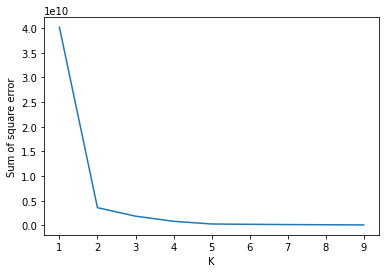

In [96]:
plt.xlabel('K')
plt.ylabel('Sum of square error')
plt.plot(k_range ,sse)